# Inaugural Project

Import relevant packages and methods, set magics:

In [1]:
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from scipy import optimize
%load_ext autoreload
%autoreload 2

The solutions to all questions are organized around a class containing methods for the individual utility, individual tax burden, population average tax burden, and the solution to the household problem. All corresponding functions and the class with innitial values of parameters are defined and explained in the HousingClass.py file.

In [2]:
from HousingClass import HousingClass

# Question 1

Create a class for question 1 and calls the solver method described above to solve the houshold problem:

In [3]:
q1 = HousingClass()    #initiate class with iniital values
q1.solve()     #call the solver method
print(f'Optimal Consumption = {q1.c:.5f}, Optimal Housing Quality = {q1.p_h:.5f}, Utility = {q1.u:.5f}')

Optimal Consumption = 0.35005, Optimal Housing Quality = 4.16529, Utility = 0.73584


# Question 2

Plot $c*$ and $h*$ as function of $m$ for in the range of 0.4 and 1.5

In [4]:
c_values = []    #create empty lists for optimal consumption values and optimal housing quality values
h_values = []
m_values = np.linspace(0.4,1.5,100)    #create space of possible cash-in-hand values

for m in m_values:    #loop over possible cash in hand values,designating each m as new m for HousingClass from question 1 
    q1.m = m
    q1.solve()     #solve each houshold problem and saving optimal consumption and housing to desginated lists
    c_values.append(q1.c)
    h_values.append(q1.p_h)

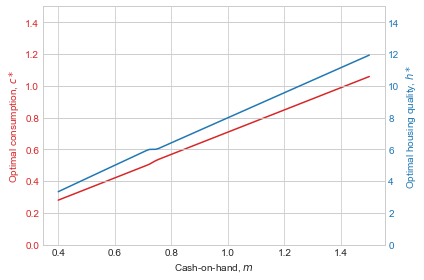

In [5]:
#plot figure with cash on hand values on x-axis 
#and spending on consumption and housing according to optimal solution on y-axes
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Cash-on-hand, $m$')
ax1.set_ylabel('Optimal consumption, $c*$',color=color)
ax1.plot(m_values,c_values, color=color)
ax1.tick_params(axis='y',labelcolor=color)
ax1.set_ylim([0,1.5])

ax2 = ax1.twinx()    # instantiate a second axes that shares x-axis
color = 'tab:blue'
ax2.set_ylabel('Optimal housing quality, $h*$', color=color)    
ax2.plot(m_values,h_values,color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([0,15])

fig.tight_layout() 

# Question 3

To calculate the average tax burden across 10000 housholds we call the corresponding class function with N=10000

In [6]:
N = 10000    #set number of individuals for questions 3-5
q1.t_avrg_func(N)    #call population average tax burden method
print(f'Average tax burden = {q1.t_avrg:.4f}')

Average tax burden = 0.0363


Below we plot the distribution of cash in hand and corresponding optimal housing values by retrieving the values of cash in hand M and list of corresponding optimal housing values p_h_list for the HousingClass of question 1.

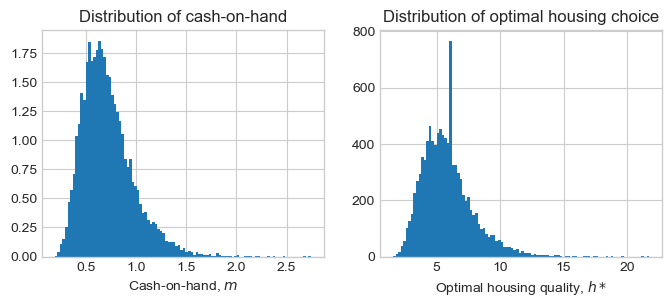

In [7]:
#plotting the distribution of cash on hand
fig = plt.figure(figsize=(8,3), dpi=100)

ax_left = fig.add_subplot(1,2,1)
ax_left.hist(q1.M,bins=100,density=True,label='normal')
ax_left.set_title('Distribution of cash-on-hand')
ax_left.set_xlabel('Cash-on-hand, $m$')
ax_left.grid(True)

ax_right = fig.add_subplot(1,2,2)
ax_right.hist(q1.p_h_list, bins=100)
ax_right.set_title('Distribution of optimal housing choice')
ax_right.set_xlabel('Optimal housing quality, $h*$')

plt.show()


We observe bunching of optimal hosuing choices around 6 mio. dkk which does not correspond similar bunching in the distribution of m. This is the same plateau observed in the figure of question 2 and can be explained by the cutoff value of the progressive tax.

# Question 4

The new average tax burden is calculated by creating a new housing class q4, setting the new attributes, and calling the average tax burden class function.

In [8]:
q4 = HousingClass()     #initiate new HousingClass and assign new parameters
q4.epsilon = 0.8
q4.tau_g = 0.01
q4.tau_p = 0.009
q4.p_bar = 8

q4.t_avrg_func(N)    #call population average tax burden method
print(f'New average tax burden = {q4.t_avrg:.4f}')

New average tax burden = 0.0450


The new average tax burden is higher than before.

# Question 5

To calculate the tax level $\tau^g$ that offsets the rise in tax burden observed in question 4, we first create a new housing class q5 with the required parameter values, second, creating a function calculating the difference between the original low average tax burden and the average tax burden for the new parameters and a variable $\tau^g$, and lastly optimizing to find the $\tau^g$ that minimizes this difference.

In [9]:
q5 = HousingClass()     #initiate new HousingClass and set parameters except for tau_g as in q4
q5.epsilon = 0.8
q5.tau_p = 0.009
q5.p_bar = 8

In [10]:
def t_avrg_dif_func(tau_g):
    """function calculating the difference between the average tax burden 
    from the first specification in question 3 and specifications with 
    new parameters from question 5 for variable levels of tau_g
    
    Args:
        
        tau_g: tax rate

    Returns:
    
        t_avrg_dif: difference between original q1 and new q5 average tax burden

    """  
    global it 
    q5.tau_g = tau_g    #set class attribute tau_g in new class equal to input tau_g
    q5.solve()     #call class solver 
    q5.t_avrg_func(N)    #call population average tax burden for N defined above
    t_avrg_dif = np.abs(q1.t_avrg - q5.t_avrg)     #calculate difference between q1 and q5 average tax burdens 
    print(f'{it:3d}: tau_g = {q5.tau_g:.10f}, tax burden difference = {t_avrg_dif:.10f}')
    it+=1
    return t_avrg_dif

In [11]:
obj = lambda x: t_avrg_dif_func(x)    #set function defined above as objective
bounds = (0,q4.tau_g)     #define bounds for tau_g between 0 and tau_g from q4 specification
x0 = [q4.tau_g]    #tau_g from q4 as initial guess 
it = 0
sol_q5 = optimize.minimize_scalar(obj, bracket=None, bounds=bounds, method='bounded', tol=None, options=None)     #call solver
print(f'The optimal tax value is {sol_q5.x:.10}!')

  0: tau_g = 0.0038196601, tax burden difference = 0.0164033588
  1: tau_g = 0.0061803399, tax burden difference = 0.0060320571
  2: tau_g = 0.0076393202, tax burden difference = 0.0001263829
  3: tau_g = 0.0085410197, tax burden difference = 0.0033477444
  4: tau_g = 0.0075368076, tax burden difference = 0.0005296084
  5: tau_g = 0.0078511873, tax burden difference = 0.0007015416
  6: tau_g = 0.0076810665, tax burden difference = 0.0000372571
  7: tau_g = 0.0077458168, tax burden difference = 0.0002906333
  8: tau_g = 0.0076777330, tax burden difference = 0.0000242034
  9: tau_g = 0.0076669699, tax burden difference = 0.0000179446
 10: tau_g = 0.0076564087, tax burden difference = 0.0000593189
 11: tau_g = 0.0076703034, tax burden difference = 0.0000048873
 12: tau_g = 0.0076736368, tax burden difference = 0.0000081800
The optimal tax value is 0.007670303397!


Setting the tax rate $\tau^g$ to about 0.00767 will offset the change in average tax burden. To test the result, we calculate the new average tax burden using the optimal $\tau^g$ for comparison with the orignal average tax burden from question 3:

In [12]:
q5.tau_g = sol_q5.x
q5.t_avrg_func(N)
print(f'Orignal average tax burden = {q1.t_avrg:.4f}, New average tax burden = {q5.t_avrg:.4f}')

Orignal average tax burden = 0.0363, New average tax burden = 0.0363
